##### About Data
The dataset contains information about Premiere league football from 2012-16.

##### Variable Description
FTHG: home team goals at end of match    
FTAG: away team goals at end of match    
FTR: match result ([h, a, d] denote [home team victory, away team victory, draw] respectively)    
HST: home team shots on target    
AST: away team shots on target    
HC: home team corner kicks    
AC: away team corner kicks    
HF: home team fouls    
AF: away team fouls    
HY: home team yellow cards    
AY: away team yellow cards    
HR: home team red cards    
AR: away team red cards    

##### Objective
Basic data exploration with respect to some of the ideas listed below:
1. Summary Stats: Matches, Teams, Referees, %home win, %away win    
2. Relegation Analysis    
3. Best/Worst performing teams    
4. Playing styles: Fouls, Shots    

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from datetime import datetime, date, time
from dateutil.parser import parse
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
season2012_13 = pd.read_csv('2012-13.csv')
season2012_13.head()

,Div,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,...,BbAv<2.5,BbAH,BbAHh,BbMxAHH,BbAvAHH,BbMxAHA,BbAvAHA,PSCH,PSCD,PSCA
0,E0,18/08/12,Arsenal,Sunderland,0,0,D,0,0,D,...,2.05,23,-1.25,2.02,1.96,1.96,1.91,1.44,4.72,8.71
1,E0,18/08/12,Fulham,Norwich,5,0,H,2,0,H,...,1.92,21,-0.50,1.83,1.80,2.14,2.09,1.84,3.75,4.75
2,E0,18/08/12,Newcastle,Tottenham,2,1,H,0,0,D,...,1.92,23,0.00,1.93,1.88,2.03,1.97,2.83,3.35,2.72
3,E0,18/08/12,QPR,Swansea,0,5,A,0,1,A,...,1.73,22,-0.25,1.80,1.75,2.21,2.13,2.00,3.53,4.15
4,E0,18/08/12,Reading,Stoke,1,1,D,0,1,A,...,1.67,24,-0.25,2.07,2.01,1.91,1.86,2.47,3.30,3.22


In [3]:
season2013_14 = pd.read_csv('2013-14.csv')
season2013_14.head()

,Div,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,...,BbAv<2.5,BbAH,BbAHh,BbMxAHH,BbAvAHH,BbMxAHA,BbAvAHA,PSCH,PSCD,PSCA
0,E0,17/08/13,Arsenal,Aston Villa,1,3,A,1,1,D,...,2.37,NaN,NaN,NaN,NaN,NaN,NaN,1.44,5.00,8.05
1,E0,17/08/13,Liverpool,Stoke,1,0,H,1,0,H,...,2.02,NaN,NaN,NaN,NaN,NaN,NaN,1.42,4.62,10.19
2,E0,17/08/13,Norwich,Everton,2,2,D,0,0,D,...,1.82,NaN,NaN,NaN,NaN,NaN,NaN,3.81,3.27,2.21
3,E0,17/08/13,Sunderland,Fulham,0,1,A,0,0,D,...,1.77,NaN,NaN,NaN,NaN,NaN,NaN,2.52,3.23,3.16
4,E0,17/08/13,Swansea,Man United,1,4,A,0,2,A,...,1.98,NaN,NaN,NaN,NaN,NaN,NaN,3.62,3.41,2.22


In [4]:
season2014_15 = pd.read_csv('2014-15.csv')
season2014_15.head()

,Div,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,...,BbAv<2.5,BbAH,BbAHh,BbMxAHH,BbAvAHH,BbMxAHA,BbAvAHA,PSCH,PSCD,PSCA
0,E0,16/08/14,Arsenal,Crystal Palace,2.0,1.0,H,1.0,1.0,D,...,2.10,24.0,-1.50,1.81,1.78,2.20,2.10,1.29,5.90,12.75
1,E0,16/08/14,Leicester,Everton,2.0,2.0,D,1.0,2.0,A,...,1.80,22.0,0.25,1.88,1.85,2.10,2.02,3.11,3.40,2.47
2,E0,16/08/14,Man United,Swansea,1.0,2.0,A,0.0,1.0,A,...,2.13,25.0,-1.50,2.18,2.08,1.87,1.79,1.45,4.81,8.25
3,E0,16/08/14,QPR,Hull,0.0,1.0,A,0.0,0.0,D,...,1.58,24.0,0.00,1.80,1.73,2.25,2.14,2.31,3.24,3.59
4,E0,16/08/14,Stoke,Aston Villa,0.0,1.0,A,0.0,0.0,D,...,1.60,23.0,-0.50,1.95,1.91,2.02,1.96,2.01,3.34,4.51


In [5]:
season2015_16 = pd.read_csv('2015-16.csv')
season2015_16.head()

,Div,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,...,BbAv<2.5,BbAH,BbAHh,BbMxAHH,BbAvAHH,BbMxAHA,BbAvAHA,PSCH,PSCD,PSCA
0,E0,08/08/15,Bournemouth,Aston Villa,0,1,A,0,0,D,...,1.79,26,-0.5,1.98,1.93,1.99,1.92,1.82,3.88,4.70
1,E0,08/08/15,Chelsea,Swansea,2,2,D,2,1,H,...,1.99,27,-1.5,2.24,2.16,1.80,1.73,1.37,5.04,10.88
2,E0,08/08/15,Everton,Watford,2,2,D,0,1,A,...,1.96,26,-1.0,2.28,2.18,1.76,1.71,1.75,3.76,5.44
3,E0,08/08/15,Leicester,Sunderland,4,2,H,3,0,H,...,1.67,26,-0.5,2.00,1.95,1.96,1.90,1.79,3.74,5.10
4,E0,08/08/15,Man United,Tottenham,1,0,H,1,0,H,...,2.01,26,-1.0,2.20,2.09,1.82,1.78,1.64,4.07,6.04


In [6]:
matches2012_13 = len(season2012_13)
matches2012_13

380

In [7]:
matches2013_14 = len(season2013_14)
matches2013_14

380

In [8]:
matches2014_15 = len(season2014_15)
matches2014_15

381

In [9]:
matches2015_16 = len(season2015_16)
matches2015_16

380

In [10]:
print(season2012_13.columns)

Index(['Div', 'Date', 'HomeTeam', 'AwayTeam', 'FTHG', 'FTAG', 'FTR', 'HTHG',
       'HTAG', 'HTR', 'Referee', 'HS', 'AS', 'HST', 'AST', 'HF', 'AF', 'HC',
       'AC', 'HY', 'AY', 'HR', 'AR', 'B365H', 'B365D', 'B365A', 'BWH', 'BWD',
       'BWA', 'GBH', 'GBD', 'GBA', 'IWH', 'IWD', 'IWA', 'LBH', 'LBD', 'LBA',
       'PSH', 'PSD', 'PSA', 'WHH', 'WHD', 'WHA', 'SJH', 'SJD', 'SJA', 'VCH',
       'VCD', 'VCA', 'BSH', 'BSD', 'BSA', 'Bb1X2', 'BbMxH', 'BbAvH', 'BbMxD',
       'BbAvD', 'BbMxA', 'BbAvA', 'BbOU', 'BbMx>2.5', 'BbAv>2.5', 'BbMx<2.5',
       'BbAv<2.5', 'BbAH', 'BbAHh', 'BbMxAHH', 'BbAvAHH', 'BbMxAHA', 'BbAvAHA',
       'PSCH', 'PSCD', 'PSCA'],
      dtype='object')


In [11]:
#loc is used for subsetting based on labels & iloc for subsetting based on index numbers
season2012_13.loc[:,:'AR'].columns

Index(['Div', 'Date', 'HomeTeam', 'AwayTeam', 'FTHG', 'FTAG', 'FTR', 'HTHG',
       'HTAG', 'HTR', 'Referee', 'HS', 'AS', 'HST', 'AST', 'HF', 'AF', 'HC',
       'AC', 'HY', 'AY', 'HR', 'AR'],
      dtype='object')

In [12]:
#Subsetting DFs till AR
season2012_13 = season2012_13.loc[:,:'AR']
season2013_14 = season2013_14.loc[:,:'AR']
season2014_15 = season2014_15.loc[:,:'AR']
season2015_16 = season2015_16.loc[:,:'AR']

In [13]:
#check for null values
print(pd.isnull(season2012_13).sum())
print(pd.isna(season2012_13).sum())

Div         0
Date        0
HomeTeam    0
AwayTeam    0
FTHG        0
FTAG        0
FTR         0
HTHG        0
HTAG        0
HTR         0
Referee     0
HS          0
AS          0
HST         0
AST         0
HF          0
AF          0
HC          0
AC          0
HY          0
AY          0
HR          0
AR          0
dtype: int64
Div         0
Date        0
HomeTeam    0
AwayTeam    0
FTHG        0
FTAG        0
FTR         0
HTHG        0
HTAG        0
HTR         0
Referee     0
HS          0
AS          0
HST         0
AST         0
HF          0
AF          0
HC          0
AC          0
HY          0
AY          0
HR          0
AR          0
dtype: int64


In [14]:
print(pd.isnull(season2013_14).sum())
print(pd.isna(season2013_14).sum())

Div         0
Date        0
HomeTeam    0
AwayTeam    0
FTHG        0
FTAG        0
FTR         0
HTHG        0
HTAG        0
HTR         0
Referee     0
HS          0
AS          0
HST         0
AST         0
HF          0
AF          0
HC          0
AC          0
HY          0
AY          0
HR          0
AR          0
dtype: int64
Div         0
Date        0
HomeTeam    0
AwayTeam    0
FTHG        0
FTAG        0
FTR         0
HTHG        0
HTAG        0
HTR         0
Referee     0
HS          0
AS          0
HST         0
AST         0
HF          0
AF          0
HC          0
AC          0
HY          0
AY          0
HR          0
AR          0
dtype: int64


In [15]:
print(pd.isnull(season2014_15).sum())
print(pd.isna(season2014_15).sum())

Div         1
Date        1
HomeTeam    1
AwayTeam    1
FTHG        1
FTAG        1
FTR         1
HTHG        1
HTAG        1
HTR         1
Referee     1
HS          1
AS          1
HST         1
AST         1
HF          1
AF          1
HC          1
AC          1
HY          1
AY          1
HR          1
AR          1
dtype: int64
Div         1
Date        1
HomeTeam    1
AwayTeam    1
FTHG        1
FTAG        1
FTR         1
HTHG        1
HTAG        1
HTR         1
Referee     1
HS          1
AS          1
HST         1
AST         1
HF          1
AF          1
HC          1
AC          1
HY          1
AY          1
HR          1
AR          1
dtype: int64


In [16]:
season2014_15[pd.isnull(season2014_15.Div)]

,Div,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,...,HST,AST,HF,AF,HC,AC,HY,AY,HR,AR
380,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [17]:
season2014_15.dropna(how='all',inplace=True)
matches2014_15 = len(season2014_15)
matches2014_15

380

In [18]:
print(pd.isnull(season2015_16).sum())
print(pd.isna(season2015_16).sum())

Div         0
Date        0
HomeTeam    0
AwayTeam    0
FTHG        0
FTAG        0
FTR         0
HTHG        0
HTAG        0
HTR         0
Referee     0
HS          0
AS          0
HST         0
AST         0
HF          0
AF          0
HC          0
AC          0
HY          0
AY          0
HR          0
AR          0
dtype: int64
Div         0
Date        0
HomeTeam    0
AwayTeam    0
FTHG        0
FTAG        0
FTR         0
HTHG        0
HTAG        0
HTR         0
Referee     0
HS          0
AS          0
HST         0
AST         0
HF          0
AF          0
HC          0
AC          0
HY          0
AY          0
HR          0
AR          0
dtype: int64


In [19]:
season2012_13['winner']=np.where(season2012_13.FTR=='A',season2012_13.AwayTeam, season2012_13.HomeTeam)
season2012_13['winner']=np.where(season2012_13.FTR=='D','Draw', season2012_13.winner)
season2012_13.head()

,Div,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,...,AST,HF,AF,HC,AC,HY,AY,HR,AR,winner
0,E0,18/08/12,Arsenal,Sunderland,0,0,D,0,0,D,...,2,12,8,7,0,0,0,0,0,Draw
1,E0,18/08/12,Fulham,Norwich,5,0,H,2,0,H,...,2,12,11,6,3,0,0,0,0,Fulham
2,E0,18/08/12,Newcastle,Tottenham,2,1,H,0,0,D,...,6,12,8,3,5,2,2,0,0,Newcastle
3,E0,18/08/12,QPR,Swansea,0,5,A,0,1,A,...,8,11,14,5,3,2,2,0,0,Swansea
4,E0,18/08/12,Reading,Stoke,1,1,D,0,1,A,...,3,9,14,4,3,2,4,0,1,Draw


In [20]:
season2012_13['GoalDif']=np.where(season2012_13.FTR=='A',season2012_13.FTAG-season2012_13.FTHG,season2012_13.FTHG-season2012_13.FTAG)
season2012_13.head()

,Div,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,...,HF,AF,HC,AC,HY,AY,HR,AR,winner,GoalDif
0,E0,18/08/12,Arsenal,Sunderland,0,0,D,0,0,D,...,12,8,7,0,0,0,0,0,Draw,0
1,E0,18/08/12,Fulham,Norwich,5,0,H,2,0,H,...,12,11,6,3,0,0,0,0,Fulham,5
2,E0,18/08/12,Newcastle,Tottenham,2,1,H,0,0,D,...,12,8,3,5,2,2,0,0,Newcastle,1
3,E0,18/08/12,QPR,Swansea,0,5,A,0,1,A,...,11,14,5,3,2,2,0,0,Swansea,5
4,E0,18/08/12,Reading,Stoke,1,1,D,0,1,A,...,9,14,4,3,2,4,0,1,Draw,0


In [21]:
season2013_14['winner']=np.where(season2013_14.FTR=='A',season2013_14.AwayTeam, season2013_14.HomeTeam)
season2013_14['winner']=np.where(season2013_14.FTR=='D','Draw', season2013_14.winner)
season2013_14['GoalDif']=np.where(season2013_14.FTR=='A',season2013_14.FTAG-season2013_14.FTHG,season2013_14.FTHG-season2013_14.FTAG)
season2013_14.head()

,Div,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,...,HF,AF,HC,AC,HY,AY,HR,AR,winner,GoalDif
0,E0,17/08/13,Arsenal,Aston Villa,1,3,A,1,1,D,...,15,18,4,3,4,5,1,0,Aston Villa,2
1,E0,17/08/13,Liverpool,Stoke,1,0,H,1,0,H,...,11,11,12,6,1,1,0,0,Liverpool,1
2,E0,17/08/13,Norwich,Everton,2,2,D,0,0,D,...,13,10,6,8,2,0,0,0,Draw,0
3,E0,17/08/13,Sunderland,Fulham,0,1,A,0,0,D,...,14,14,6,1,0,3,0,0,Fulham,1
4,E0,17/08/13,Swansea,Man United,1,4,A,0,2,A,...,13,10,7,4,1,3,0,0,Man United,3


In [22]:
season2014_15['winner']=np.where(season2014_15.FTR=='A',season2014_15.AwayTeam, season2014_15.HomeTeam)
season2014_15['winner']=np.where(season2014_15.FTR=='D','Draw', season2014_15.winner)
season2014_15['GoalDif']=np.where(season2014_15.FTR=='A',season2014_15.FTAG-season2014_15.FTHG,season2014_15.FTHG-season2014_15.FTAG)
season2014_15.head()

,Div,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,...,HF,AF,HC,AC,HY,AY,HR,AR,winner,GoalDif
0,E0,16/08/14,Arsenal,Crystal Palace,2.0,1.0,H,1.0,1.0,D,...,13.0,19.0,9.0,3.0,2.0,2.0,0.0,1.0,Arsenal,1.0
1,E0,16/08/14,Leicester,Everton,2.0,2.0,D,1.0,2.0,A,...,16.0,10.0,3.0,6.0,1.0,1.0,0.0,0.0,Draw,0.0
2,E0,16/08/14,Man United,Swansea,1.0,2.0,A,0.0,1.0,A,...,14.0,20.0,4.0,0.0,2.0,4.0,0.0,0.0,Swansea,1.0
3,E0,16/08/14,QPR,Hull,0.0,1.0,A,0.0,0.0,D,...,10.0,10.0,8.0,9.0,1.0,2.0,0.0,0.0,Hull,1.0
4,E0,16/08/14,Stoke,Aston Villa,0.0,1.0,A,0.0,0.0,D,...,14.0,9.0,2.0,8.0,0.0,3.0,0.0,0.0,Aston Villa,1.0


In [23]:
season2015_16['winner']=np.where(season2015_16.FTR=='A',season2015_16.AwayTeam, season2015_16.HomeTeam)
season2015_16['winner']=np.where(season2015_16.FTR=='D','Draw', season2015_16.winner)
season2015_16['GoalDif']=np.where(season2015_16.FTR=='A',season2015_16.FTAG-season2015_16.FTHG,season2015_16.FTHG-season2015_16.FTAG)
season2015_16.head()

,Div,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,...,HF,AF,HC,AC,HY,AY,HR,AR,winner,GoalDif
0,E0,08/08/15,Bournemouth,Aston Villa,0,1,A,0,0,D,...,13,13,6,3,3,4,0,0,Aston Villa,1
1,E0,08/08/15,Chelsea,Swansea,2,2,D,2,1,H,...,15,16,4,8,1,3,1,0,Draw,0
2,E0,08/08/15,Everton,Watford,2,2,D,0,1,A,...,7,13,8,2,1,2,0,0,Draw,0
3,E0,08/08/15,Leicester,Sunderland,4,2,H,3,0,H,...,13,17,6,3,2,4,0,0,Leicester,2
4,E0,08/08/15,Man United,Tottenham,1,0,H,1,0,H,...,12,12,1,2,2,3,0,0,Man United,1


In [24]:
table_season2012_13 = pd.DataFrame({'Team':np.unique(season2012_13['HomeTeam'])})
table_season2012_13['Matches']=float('NaN')
table_season2012_13.set_index('Team',inplace=True)
for team in table_season2012_13.index:
    table_season2012_13.loc[team,'Matches']=sum(season2012_13['HomeTeam']==team)+sum(season2012_13['AwayTeam']==team)
    table_season2012_13.loc[team,'Won']=sum(season2012_13.winner==team)
    table_season2012_13.loc[team,'Draw']=sum(season2012_13.winner[season2012_13.HomeTeam==team]=='Draw')+sum(season2012_13.winner[season2012_13.AwayTeam==team]=='Draw')
    table_season2012_13.loc[team,'GF']=sum(season2012_13.FTHG[season2012_13.HomeTeam==team])+sum(season2012_13.FTAG[season2012_13.AwayTeam==team])
    table_season2012_13.loc[team,'GA']=sum(season2012_13.FTAG[season2012_13.HomeTeam==team])+sum(season2012_13.FTHG[season2012_13.AwayTeam==team])
    table_season2012_13.loc[team,'HomeWin%']=(sum(season2012_13.winner[season2012_13.HomeTeam==team]==team)/38)*100
    table_season2012_13.loc[team,'Corners']=sum(season2012_13.HC[season2012_13.HomeTeam==team])+sum(season2012_13.AC[season2012_13.AwayTeam==team])
    table_season2012_13.loc[team,'YCards']=sum(season2012_13.HY[season2012_13.HomeTeam==team])+sum(season2012_13.AY[season2012_13.AwayTeam==team])
    table_season2012_13.loc[team,'RCards']=sum(season2012_13.HR[season2012_13.HomeTeam==team])+sum(season2012_13.AR[season2012_13.AwayTeam==team])
    table_season2012_13.loc[team,'Fouls']=sum(season2012_13.HF[season2012_13.HomeTeam==team])+sum(season2012_13.AF[season2012_13.AwayTeam==team])
    table_season2012_13.loc[team,'ShotsTaken']=sum(season2012_13.HS[season2012_13.HomeTeam==team])+sum(season2012_13.AS[season2012_13.AwayTeam==team])
    table_season2012_13.loc[team,'ShotsOnTarget']=sum(season2012_13.HST[season2012_13.HomeTeam==team])+sum(season2012_13.AST[season2012_13.AwayTeam==team])
table_season2012_13.Matches = table_season2012_13.Matches.astype(int)
table_season2012_13.Won = table_season2012_13.Won.astype(int)
table_season2012_13.Draw = table_season2012_13.Draw.astype(int)
table_season2012_13.GF = table_season2012_13.GF.astype(int)
table_season2012_13.GA = table_season2012_13.GA.astype(int)
table_season2012_13.Corners = table_season2012_13.Corners.astype(int)
table_season2012_13.Fouls = table_season2012_13.Fouls.astype(int)
table_season2012_13.YCards = table_season2012_13.YCards.astype(int)
table_season2012_13.RCards = table_season2012_13.RCards.astype(int)
table_season2012_13.ShotsTaken = table_season2012_13.ShotsTaken.astype(int)
table_season2012_13.ShotsOnTarget = table_season2012_13.ShotsOnTarget.astype(int)
table_season2012_13['HomeWin%'] = table_season2012_13['HomeWin%'].apply(lambda x:float("{0:.2f}".format(x)))
table_season2012_13['GD']=table_season2012_13.GF-table_season2012_13.GA
table_season2012_13['Lost']=table_season2012_13.Matches-table_season2012_13.Won-table_season2012_13.Draw
table_season2012_13['Points']=table_season2012_13.Won*3+table_season2012_13.Draw
table_season2012_13['SOTperc']=round((table_season2012_13.ShotsOnTarget/table_season2012_13.ShotsTaken)*100,2)

In [25]:
table_season2012_13.sort_values(by=['Points','GD'],ascending=False, inplace=True)
table_season2012_13['Rank']=np.arange(1,21)
table_season2012_13

,Matches,Won,Draw,GF,GA,HomeWin%,Corners,YCards,RCards,Fouls,ShotsTaken,ShotsOnTarget,GD,Lost,Points,SOTperc,Rank
Team,,,,,,,,,,,,,,,,,
Man United,38,28,5,86,43,42.11,218,57,1,361,512,299,43,5,89,58.40,1
Man City,38,23,9,66,34,36.84,269,63,3,443,601,352,32,6,78,58.57,2
Chelsea,38,22,9,75,39,31.58,240,52,3,371,569,336,36,7,75,59.05,3
Arsenal,38,21,10,72,37,28.95,260,44,5,360,546,326,35,7,73,59.71,4
Tottenham,38,21,9,66,46,28.95,261,53,2,342,617,381,20,8,72,61.75,5
Everton,38,16,15,55,40,31.58,257,60,3,413,561,321,15,7,63,57.22,6
Liverpool,38,16,13,71,43,23.68,285,54,2,372,669,385,28,9,61,57.55,7
West Brom,38,14,7,53,57,23.68,202,62,4,408,460,253,-4,17,49,55.00,8
Swansea,38,11,13,47,51,15.79,194,58,2,387,460,262,-4,14,46,56.96,9


In [26]:
table_season2013_14 = pd.DataFrame({'Team':np.unique(season2013_14['HomeTeam'])})
table_season2013_14['Matches']=float('NaN')
table_season2013_14.set_index('Team',inplace=True)
for team in table_season2013_14.index:
    table_season2013_14.loc[team,'Matches']=sum(season2013_14['HomeTeam']==team)+sum(season2013_14['AwayTeam']==team)
    table_season2013_14.loc[team,'Won']=sum(season2013_14.winner==team)
    table_season2013_14.loc[team,'Draw']=sum(season2013_14.winner[season2013_14.HomeTeam==team]=='Draw')+sum(season2013_14.winner[season2013_14.AwayTeam==team]=='Draw')
    table_season2013_14.loc[team,'GF']=sum(season2013_14.FTHG[season2013_14.HomeTeam==team])+sum(season2013_14.FTAG[season2013_14.AwayTeam==team])
    table_season2013_14.loc[team,'GA']=sum(season2013_14.FTAG[season2013_14.HomeTeam==team])+sum(season2013_14.FTHG[season2013_14.AwayTeam==team])
    table_season2013_14.loc[team,'HomeWin%']=(sum(season2013_14.winner[season2013_14.HomeTeam==team]==team)/38)*100
    table_season2013_14.loc[team,'Corners']=sum(season2013_14.HC[season2013_14.HomeTeam==team])+sum(season2013_14.AC[season2013_14.AwayTeam==team])
    table_season2013_14.loc[team,'YCards']=sum(season2013_14.HY[season2013_14.HomeTeam==team])+sum(season2013_14.AY[season2013_14.AwayTeam==team])
    table_season2013_14.loc[team,'RCards']=sum(season2013_14.HR[season2013_14.HomeTeam==team])+sum(season2013_14.AR[season2013_14.AwayTeam==team])
    table_season2013_14.loc[team,'Fouls']=sum(season2013_14.HF[season2013_14.HomeTeam==team])+sum(season2013_14.AF[season2013_14.AwayTeam==team])
    table_season2013_14.loc[team,'ShotsTaken']=sum(season2013_14.HS[season2013_14.HomeTeam==team])+sum(season2013_14.AS[season2013_14.AwayTeam==team])
    table_season2013_14.loc[team,'ShotsOnTarget']=sum(season2013_14.HST[season2013_14.HomeTeam==team])+sum(season2013_14.AST[season2013_14.AwayTeam==team])
table_season2013_14.Matches = table_season2013_14.Matches.astype(int)
table_season2013_14.Won = table_season2013_14.Won.astype(int)
table_season2013_14.Draw = table_season2013_14.Draw.astype(int)
table_season2013_14.GF = table_season2013_14.GF.astype(int)
table_season2013_14.GA = table_season2013_14.GA.astype(int)
table_season2013_14.Corners = table_season2013_14.Corners.astype(int)
table_season2013_14.Fouls = table_season2013_14.Fouls.astype(int)
table_season2013_14.YCards = table_season2013_14.YCards.astype(int)
table_season2013_14.RCards = table_season2013_14.RCards.astype(int)
table_season2013_14.ShotsTaken = table_season2013_14.ShotsTaken.astype(int)
table_season2013_14.ShotsOnTarget = table_season2013_14.ShotsOnTarget.astype(int)
table_season2013_14['HomeWin%'] = table_season2013_14['HomeWin%'].apply(lambda x:float("{0:.2f}".format(x)))
table_season2013_14['GD']=table_season2013_14.GF-table_season2013_14.GA
table_season2013_14['Lost']=table_season2013_14.Matches-table_season2013_14.Won-table_season2013_14.Draw
table_season2013_14['Points']=table_season2013_14.Won*3+table_season2013_14.Draw
table_season2013_14['SOTperc']=round((table_season2013_14.ShotsOnTarget/table_season2013_14.ShotsTaken)*100,2)

In [27]:
table_season2013_14.sort_values(by=['Points','GD'],ascending=False, inplace=True)
table_season2013_14['Rank']=np.arange(1,21)

In [28]:
table_season2013_14

,Matches,Won,Draw,GF,GA,HomeWin%,Corners,YCards,RCards,Fouls,ShotsTaken,ShotsOnTarget,GD,Lost,Points,SOTperc,Rank
Team,,,,,,,,,,,,,,,,,
Man City,38,27,5,102,37,44.74,283,72,1,394,673,238,65,6,86,35.36,1
Liverpool,38,26,6,101,50,42.11,224,54,1,410,650,259,51,6,84,39.85,2
Chelsea,38,25,7,71,27,39.47,249,56,3,420,693,228,44,6,82,32.90,3
Arsenal,38,24,7,68,41,34.21,211,53,4,348,524,210,27,7,79,40.08,4
Everton,38,21,9,61,39,34.21,251,54,1,365,560,195,22,8,72,34.82,5
Tottenham,38,21,6,55,51,28.95,230,66,4,403,584,189,4,11,69,32.36,6
Man United,38,19,7,64,43,23.68,216,66,3,399,525,181,21,12,64,34.48,7
Southampton,38,15,11,54,46,21.05,211,60,0,443,531,177,8,12,56,33.33,8
Stoke,38,13,11,45,52,26.32,164,72,5,485,425,139,-7,14,50,32.71,9


In [29]:
table_season2014_15 = pd.DataFrame({'Team':np.unique(season2014_15['HomeTeam'])})
table_season2014_15['Matches']=float('NaN')
table_season2014_15.set_index('Team',inplace=True)
for team in table_season2014_15.index:
    table_season2014_15.loc[team,'Matches']=sum(season2014_15['HomeTeam']==team)+sum(season2014_15['AwayTeam']==team)
    table_season2014_15.loc[team,'Won']=sum(season2014_15.winner==team)
    table_season2014_15.loc[team,'Draw']=sum(season2014_15.winner[season2014_15.HomeTeam==team]=='Draw')+sum(season2014_15.winner[season2014_15.AwayTeam==team]=='Draw')
    table_season2014_15.loc[team,'GF']=sum(season2014_15.FTHG[season2014_15.HomeTeam==team])+sum(season2014_15.FTAG[season2014_15.AwayTeam==team])
    table_season2014_15.loc[team,'GA']=sum(season2014_15.FTAG[season2014_15.HomeTeam==team])+sum(season2014_15.FTHG[season2014_15.AwayTeam==team])
    table_season2014_15.loc[team,'HomeWin%']=(sum(season2014_15.winner[season2014_15.HomeTeam==team]==team)/38)*100
    table_season2014_15.loc[team,'Corners']=sum(season2014_15.HC[season2014_15.HomeTeam==team])+sum(season2014_15.AC[season2014_15.AwayTeam==team])
    table_season2014_15.loc[team,'YCards']=sum(season2014_15.HY[season2014_15.HomeTeam==team])+sum(season2014_15.AY[season2014_15.AwayTeam==team])
    table_season2014_15.loc[team,'RCards']=sum(season2014_15.HR[season2014_15.HomeTeam==team])+sum(season2014_15.AR[season2014_15.AwayTeam==team])
    table_season2014_15.loc[team,'Fouls']=sum(season2014_15.HF[season2014_15.HomeTeam==team])+sum(season2014_15.AF[season2014_15.AwayTeam==team])
    table_season2014_15.loc[team,'ShotsTaken']=sum(season2014_15.HS[season2014_15.HomeTeam==team])+sum(season2014_15.AS[season2014_15.AwayTeam==team])
    table_season2014_15.loc[team,'ShotsOnTarget']=sum(season2014_15.HST[season2014_15.HomeTeam==team])+sum(season2014_15.AST[season2014_15.AwayTeam==team])
table_season2014_15.Matches = table_season2014_15.Matches.astype(int)
table_season2014_15.Won = table_season2014_15.Won.astype(int)
table_season2014_15.Draw = table_season2014_15.Draw.astype(int)
table_season2014_15.GF = table_season2014_15.GF.astype(int)
table_season2014_15.GA = table_season2014_15.GA.astype(int)
table_season2014_15.Corners = table_season2014_15.Corners.astype(int)
table_season2014_15.Fouls = table_season2014_15.Fouls.astype(int)
table_season2014_15.YCards = table_season2014_15.YCards.astype(int)
table_season2014_15.RCards = table_season2014_15.RCards.astype(int)
table_season2014_15.ShotsTaken = table_season2014_15.ShotsTaken.astype(int)
table_season2014_15.ShotsOnTarget = table_season2014_15.ShotsOnTarget.astype(int)
table_season2014_15['HomeWin%'] = table_season2014_15['HomeWin%'].apply(lambda x:float("{0:.2f}".format(x)))
table_season2014_15['GD']=table_season2014_15.GF-table_season2014_15.GA
table_season2014_15['Lost']=table_season2014_15.Matches-table_season2014_15.Won-table_season2014_15.Draw
table_season2014_15['Points']=table_season2014_15.Won*3+table_season2014_15.Draw
table_season2014_15['SOTperc']=round((table_season2014_15.ShotsOnTarget/table_season2014_15.ShotsTaken)*100,2)

In [30]:
table_season2014_15.sort_values(by=['Points','GD'],ascending=False, inplace=True)
table_season2014_15['Rank']=np.arange(1,21)

In [31]:
table_season2014_15

,Matches,Won,Draw,GF,GA,HomeWin%,Corners,YCards,RCards,Fouls,ShotsTaken,ShotsOnTarget,GD,Lost,Points,SOTperc,Rank
Team,,,,,,,,,,,,,,,,,
Chelsea,38,26,9,73,32,39.47,226,77,4,382,563,210,41,3,87,37.30,1
Man City,38,24,7,83,38,36.84,273,77,2,445,668,228,45,7,79,34.13,2
Arsenal,38,22,9,71,36,31.58,254,68,2,377,612,228,35,7,75,37.25,3
Man United,38,20,10,62,37,36.84,213,64,5,453,509,179,25,8,70,35.17,4
Tottenham,38,19,7,58,53,26.32,224,79,4,441,524,172,5,12,64,32.82,5
Liverpool,38,18,8,52,48,26.32,198,66,3,385,590,194,4,12,62,32.88,6
Southampton,38,18,6,54,33,28.95,209,57,3,468,506,170,21,14,60,33.60,7
Swansea,38,16,8,46,49,23.68,151,48,5,398,422,147,-3,14,56,34.83,8
Stoke,38,15,9,48,45,26.32,192,82,1,486,501,136,3,14,54,27.15,9


In [32]:
table_season2015_16 = pd.DataFrame({'Team':np.unique(season2015_16['HomeTeam'])})
table_season2015_16['Matches']=float('NaN')
table_season2015_16.set_index('Team',inplace=True)
for team in table_season2015_16.index:
    table_season2015_16.loc[team,'Matches']=sum(season2015_16['HomeTeam']==team)+sum(season2015_16['AwayTeam']==team)
    table_season2015_16.loc[team,'Won']=sum(season2015_16.winner==team)
    table_season2015_16.loc[team,'Draw']=sum(season2015_16.winner[season2015_16.HomeTeam==team]=='Draw')+sum(season2015_16.winner[season2015_16.AwayTeam==team]=='Draw')
    table_season2015_16.loc[team,'GF']=sum(season2015_16.FTHG[season2015_16.HomeTeam==team])+sum(season2015_16.FTAG[season2015_16.AwayTeam==team])
    table_season2015_16.loc[team,'GA']=sum(season2015_16.FTAG[season2015_16.HomeTeam==team])+sum(season2015_16.FTHG[season2015_16.AwayTeam==team])
    table_season2015_16.loc[team,'HomeWin%']=(sum(season2015_16.winner[season2015_16.HomeTeam==team]==team)/38)*100
    table_season2015_16.loc[team,'Corners']=sum(season2015_16.HC[season2015_16.HomeTeam==team])+sum(season2015_16.AC[season2015_16.AwayTeam==team])
    table_season2015_16.loc[team,'YCards']=sum(season2015_16.HY[season2015_16.HomeTeam==team])+sum(season2015_16.AY[season2015_16.AwayTeam==team])
    table_season2015_16.loc[team,'RCards']=sum(season2015_16.HR[season2015_16.HomeTeam==team])+sum(season2015_16.AR[season2015_16.AwayTeam==team])
    table_season2015_16.loc[team,'Fouls']=sum(season2015_16.HF[season2015_16.HomeTeam==team])+sum(season2015_16.AF[season2015_16.AwayTeam==team])
    table_season2015_16.loc[team,'ShotsTaken']=sum(season2015_16.HS[season2015_16.HomeTeam==team])+sum(season2015_16.AS[season2015_16.AwayTeam==team])
    table_season2015_16.loc[team,'ShotsOnTarget']=sum(season2015_16.HST[season2015_16.HomeTeam==team])+sum(season2015_16.AST[season2015_16.AwayTeam==team])
table_season2015_16.Matches = table_season2015_16.Matches.astype(int)
table_season2015_16.Won = table_season2015_16.Won.astype(int)
table_season2015_16.Draw = table_season2015_16.Draw.astype(int)
table_season2015_16.GF = table_season2015_16.GF.astype(int)
table_season2015_16.GA = table_season2015_16.GA.astype(int)
table_season2015_16.Corners = table_season2015_16.Corners.astype(int)
table_season2015_16.Fouls = table_season2015_16.Fouls.astype(int)
table_season2015_16.YCards = table_season2015_16.YCards.astype(int)
table_season2015_16.RCards = table_season2015_16.RCards.astype(int)
table_season2015_16.ShotsTaken = table_season2015_16.ShotsTaken.astype(int)
table_season2015_16.ShotsOnTarget = table_season2015_16.ShotsOnTarget.astype(int)
table_season2015_16['HomeWin%'] = table_season2015_16['HomeWin%'].apply(lambda x:float("{0:.2f}".format(x)))
table_season2015_16['GD']=table_season2015_16.GF-table_season2015_16.GA
table_season2015_16['Lost']=table_season2015_16.Matches-table_season2015_16.Won-table_season2015_16.Draw
table_season2015_16['Points']=table_season2015_16.Won*3+table_season2015_16.Draw
table_season2015_16['SOTperc']=round((table_season2015_16.ShotsOnTarget/table_season2015_16.ShotsTaken)*100,2)

In [33]:
table_season2015_16.sort_values(by=['Points','GD'],ascending=False, inplace=True)
table_season2015_16['Rank']=np.arange(1,21)
table_season2015_16

,Matches,Won,Draw,GF,GA,HomeWin%,Corners,YCards,RCards,Fouls,ShotsTaken,ShotsOnTarget,GD,Lost,Points,SOTperc,Rank
Team,,,,,,,,,,,,,,,,,
Leicester,38,23,12,68,36,31.58,197,48,3,405,523,181,32,3,81,34.61,1
Arsenal,38,20,11,65,36,31.58,227,39,4,350,572,210,29,7,71,36.71,2
Tottenham,38,19,13,69,35,26.32,254,72,0,452,661,250,34,6,70,37.82,3
Man City,38,19,9,71,41,31.58,257,61,0,409,612,210,30,10,66,34.31,4
Man United,38,19,9,49,35,31.58,228,65,1,472,430,143,14,10,66,33.26,5
Southampton,38,18,9,59,41,28.95,224,57,6,416,519,169,18,11,63,32.56,6
West Ham,38,16,14,65,51,23.68,224,56,5,381,556,184,14,8,62,33.09,7
Liverpool,38,16,12,63,50,21.05,265,61,3,422,629,203,13,10,60,32.27,8
Stoke,38,14,9,41,55,21.05,153,51,4,419,418,130,-14,15,51,31.10,9


In [34]:
#Summary statistics

#Teams
print("Number of teams in each season: 20")

#Matches
print("Number of Matches in each season %d" %(matches2012_13))

#Referees
print("Number of Referees in 2012-13 Season: %d" %(season2012_13.Referee.nunique()))
print("Number of Referees in 2013-14 Season: %d" %(season2013_14.Referee.nunique()))
print("Number of Referees in 2014-15 Season: %d" %(season2014_15.Referee.nunique()))
print("Number of Referees in 2015-16 Season: %d" %(season2015_16.Referee.nunique()))

#%Home Wins
hw_2012_13 = sum(season2012_13.HomeTeam==season2012_13.winner)/matches2012_13
hw_2013_14 = sum(season2013_14.HomeTeam==season2013_14.winner)/matches2012_13
hw_2014_15 = sum(season2014_15.HomeTeam==season2014_15.winner)/matches2012_13
hw_2015_16 = sum(season2015_16.HomeTeam==season2015_16.winner)/matches2012_13
print("Percentage Home Wins 2012-13 Season: %.2f" %(hw_2012_13))
print("Percentage Home Wins 2013-14 Season: %.2f" %(hw_2013_14))
print("Percentage Home Wins 2014-15 Season: %.2f" %(hw_2014_15))
print("Percentage Home Wins 2015-16 Season: %.2f" %(hw_2015_16))

#%Away Wins
aw_2012_13 = sum(season2012_13.AwayTeam==season2012_13.winner)/matches2012_13
aw_2013_14 = sum(season2013_14.AwayTeam==season2013_14.winner)/matches2012_13
aw_2014_15 = sum(season2014_15.AwayTeam==season2014_15.winner)/matches2012_13
aw_2015_16 = sum(season2015_16.AwayTeam==season2015_16.winner)/matches2012_13
print("Percentage Away Wins 2012-13 Season: %.2f" %(aw_2012_13))
print("Percentage Away Wins 2013-14 Season: %.2f" %(aw_2013_14))
print("Percentage Away Wins 2014-15 Season: %.2f" %(aw_2014_15))
print("Percentage Away Wins 2015-16 Season: %.2f" %(aw_2015_16))

Number of teams in each season: 20
Number of Matches in each season 380
Number of Referees in 2012-13 Season: 19
Number of Referees in 2013-14 Season: 18
Number of Referees in 2014-15 Season: 21
Number of Referees in 2015-16 Season: 19
Percentage Home Wins 2012-13 Season: 0.44
Percentage Home Wins 2013-14 Season: 0.47
Percentage Home Wins 2014-15 Season: 0.45
Percentage Home Wins 2015-16 Season: 0.41
Percentage Away Wins 2012-13 Season: 0.28
Percentage Away Wins 2013-14 Season: 0.32
Percentage Away Wins 2014-15 Season: 0.30
Percentage Away Wins 2015-16 Season: 0.31


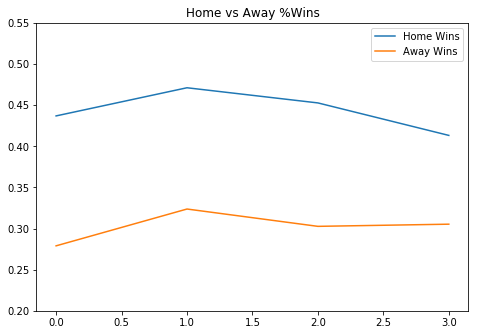

In [35]:
#Home vs Away plots
hw = [hw_2012_13,hw_2013_14,hw_2014_15,hw_2015_16]
aw = [aw_2012_13,aw_2013_14,aw_2014_15,aw_2015_16]
fig = plt.figure()
ax=fig.add_axes([0,0,1,1])
ax.set_ylim(0.2,0.55)
ax.set_title('Home vs Away %Wins')
ax.plot(hw, label='Home Wins')
ax.plot(aw, label='Away Wins')
plt.legend()

In [36]:
season2012_13.Date[0]

'18/08/12'

In [37]:
season2012_13.Date = pd.to_datetime(season2012_13.Date)
season2013_14.Date = pd.to_datetime(season2013_14.Date)
season2014_15.Date = pd.to_datetime(season2014_15.Date)
season2015_16.Date = pd.to_datetime(season2015_16.Date)

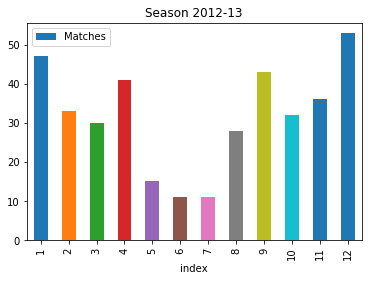

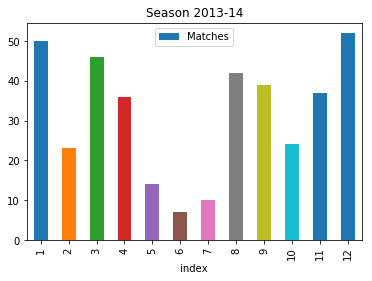

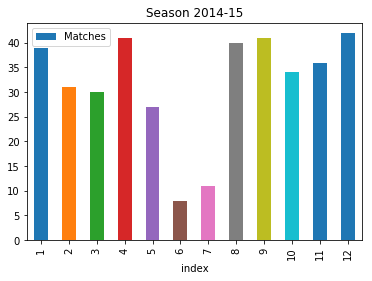

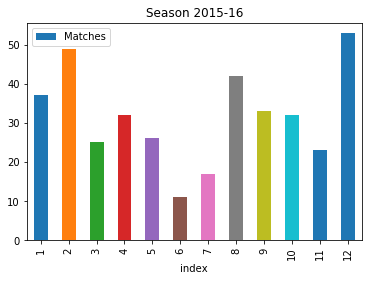

In [38]:
season2012_13.Date.apply(lambda x:x.month).value_counts().reset_index().sort_values('index').plot(kind='bar',y='Date',x='index',label='Matches',title='Season 2012-13')
season2013_14.Date.apply(lambda x:x.month).value_counts().reset_index().sort_values('index').plot(kind='bar',x='index',y='Date',label='Matches',title='Season 2013-14')
season2014_15.Date.apply(lambda x:x.month).value_counts().reset_index().sort_values('index').plot(kind='bar',x='index',y='Date',label='Matches',title='Season 2014-15')
season2015_16.Date.apply(lambda x:x.month).value_counts().reset_index().sort_values('index').plot(kind='bar',x='index',y='Date',label='Matches',title='Season 2015-16')

Text(0,0.5,'HomeWin%')

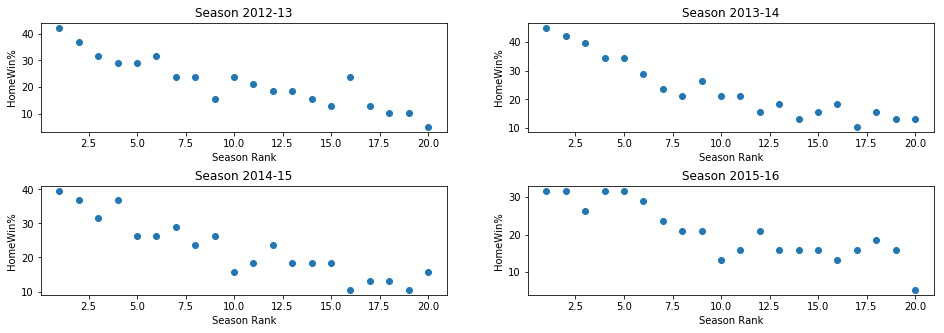

In [39]:
plt.figure(figsize=(16,5))
plt.subplots_adjust(hspace=0.5)
plt.subplot(2,2,1)
plt.title ('Season 2012-13')
new_y, new_x = zip(*sorted(zip(table_season2012_13['HomeWin%'],table_season2012_13['Rank']),reverse=True))
plt.scatter(new_x,new_y)
plt.xlabel('Season Rank')
plt.ylabel('HomeWin%')
plt.subplot(2,2,2)
plt.title ('Season 2013-14')
plt.scatter(table_season2013_14.Rank,table_season2013_14['HomeWin%'])
plt.xlabel('Season Rank')
plt.ylabel('HomeWin%')
plt.subplot(2,2,3)
plt.title ('Season 2014-15')
plt.scatter(table_season2014_15.Rank,table_season2014_15['HomeWin%'])
plt.xlabel('Season Rank')
plt.ylabel('HomeWin%')
plt.subplot(2,2,4)
plt.title ('Season 2015-16')
plt.scatter(table_season2015_16.Rank,table_season2015_16['HomeWin%'])
plt.xlabel('Season Rank')
plt.ylabel('HomeWin%')

In [40]:
table_season2012_13[0:4]

,Matches,Won,Draw,GF,GA,HomeWin%,Corners,YCards,RCards,Fouls,ShotsTaken,ShotsOnTarget,GD,Lost,Points,SOTperc,Rank
Team,,,,,,,,,,,,,,,,,
Man United,38,28,5,86,43,42.11,218,57,1,361,512,299,43,5,89,58.40,1
Man City,38,23,9,66,34,36.84,269,63,3,443,601,352,32,6,78,58.57,2
Chelsea,38,22,9,75,39,31.58,240,52,3,371,569,336,36,7,75,59.05,3
Arsenal,38,21,10,72,37,28.95,260,44,5,360,546,326,35,7,73,59.71,4


In [41]:
season2012_13WinRef=season2012_13.Referee[season2012_13.HomeTeam==table_season2012_13.index[0]].unique()
HomeMatches_topper_12_13 = season2012_13[['HomeTeam','Referee','winner']]
HomeMatches_topper_12_13 = HomeMatches_topper_12_13[HomeMatches_topper_12_13.Referee.isin(season2012_13WinRef)&(HomeMatches_topper_12_13.HomeTeam==table_season2012_13.index[0])]
HomeMatches_topper_12_13['Wins']=np.where(HomeMatches_topper_12_13.winner==table_season2012_13.index[0],1,0)
gp = HomeMatches_topper_12_13.groupby(by='Referee')
topper_12_13 = gp.count()   
topper_12_13.rename(columns={'HomeTeam':'Matches'},inplace=True)
topper_12_13.Wins = gp.sum()
topper_12_13 = topper_12_13[['Matches','Wins']]
topper_12_13['S12-13%']=round((topper_12_13.Wins/topper_12_13.Matches)*100,2)
topper_12_13

,Matches,Wins,S12-13%
Referee,,,
A Taylor,2,2,100.00
C Foy,2,1,50.00
H Webb,2,1,50.00
J Moss,2,2,100.00
K Friend,1,1,100.00
L Mason,2,2,100.00
L Probert,1,1,100.00
M Dean,3,2,66.67
M Halsey,1,1,100.00


In [42]:
season2012_13WinRef_2=season2013_14.Referee[season2013_14.HomeTeam==table_season2012_13.index[0]].unique()
HomeMatches_topper_12_13_2 = season2013_14[['HomeTeam','Referee','winner']]
HomeMatches_topper_12_13_2 = HomeMatches_topper_12_13_2[HomeMatches_topper_12_13_2.Referee.isin(season2012_13WinRef_2)&(HomeMatches_topper_12_13_2.HomeTeam==table_season2012_13.index[0])]
HomeMatches_topper_12_13_2['Wins']=np.where(HomeMatches_topper_12_13_2.winner==table_season2012_13.index[0],1,0)
gp = HomeMatches_topper_12_13_2.groupby(by='Referee')
topper_12_13_2 = gp.count()   
topper_12_13_2.rename(columns={'HomeTeam':'Matches'},inplace=True)
topper_12_13_2.Wins = gp.sum()
topper_12_13_2 = topper_12_13_2[['Matches','Wins']]
topper_12_13_2['S13-14%']=round((topper_12_13_2.Wins/topper_12_13_2.Matches)*100,2)
topper_12_13_2

,Matches,Wins,S13-14%
Referee,,,
A Marriner,1,0,0.00
C Foy,1,1,100.00
C Pawson,2,2,100.00
H Webb,2,0,0.00
J Moss,1,1,100.00
K Friend,1,0,0.00
L Mason,1,1,100.00
L Probert,1,1,100.00
M Atkinson,3,1,33.33


In [43]:
season2012_13WinRef_3=season2014_15.Referee[season2014_15.HomeTeam==table_season2012_13.index[0]].unique()
HomeMatches_topper_12_13_3 = season2014_15[['HomeTeam','Referee','winner']]
HomeMatches_topper_12_13_3 = HomeMatches_topper_12_13_3[HomeMatches_topper_12_13_3.Referee.isin(season2012_13WinRef_3)&(HomeMatches_topper_12_13_3.HomeTeam==table_season2012_13.index[0])]
HomeMatches_topper_12_13_3['Wins']=np.where(HomeMatches_topper_12_13_3.winner==table_season2012_13.index[0],1,0)
#print(HomeMatches_topper_12_13_3)
gp = HomeMatches_topper_12_13_3.groupby(by='Referee')
topper_12_13_3 = gp.count()   
topper_12_13_3.rename(columns={'HomeTeam':'Matches'},inplace=True)
topper_12_13_3.Wins = gp.sum()
topper_12_13_3 = topper_12_13_3[['Matches','Wins']]
topper_12_13_3['S14-15%']=round((topper_12_13_3.Wins/topper_12_13_3.Matches)*100,2)
topper_12_13_3

,Matches,Wins,S14-15%
Referee,,,
A Taylor,2,1,50.00
C Foy,1,1,100.00
J Moss,1,1,100.00
K Friend,2,2,100.00
L Mason,1,1,100.00
M Atkinson,2,2,100.00
M Clattenburg,2,2,100.00
M Dean,2,0,0.00
M Jones,1,1,100.00


In [44]:
season2012_13WinRef_4=season2015_16.Referee[season2015_16.HomeTeam==table_season2012_13.index[0]].unique()
HomeMatches_topper_12_13_4 = season2015_16[['HomeTeam','Referee','winner']]
HomeMatches_topper_12_13_4 = HomeMatches_topper_12_13_4[HomeMatches_topper_12_13_4.Referee.isin(season2012_13WinRef_4)&(HomeMatches_topper_12_13_4.HomeTeam==table_season2012_13.index[0])]
HomeMatches_topper_12_13_4['Wins']=np.where(HomeMatches_topper_12_13_4.winner==table_season2012_13.index[0],1,0)
#print(HomeMatches_topper_12_13_3)
gp = HomeMatches_topper_12_13_4.groupby(by='Referee')
topper_12_13_4 = gp.count()   
topper_12_13_4.rename(columns={'HomeTeam':'Matches'},inplace=True)
topper_12_13_4.Wins = gp.sum()
topper_12_13_4 = topper_12_13_4[['Matches','Wins']]
topper_12_13_4['S15-16%']=round((topper_12_13_4.Wins/topper_12_13_4.Matches)*100,2)
topper_12_13_4

,Matches,Wins,S15-16%
Referee,,,
A Marriner,1,1,100.00
C Pawson,2,1,50.00
J Moss,3,3,100.00
K Friend,1,1,100.00
L Mason,1,1,100.00
M Atkinson,1,0,0.00
M Clattenburg,2,0,0.00
M Dean,1,1,100.00
M Jones,3,2,66.67


Evaluating Manchester United's Performance at Home Grounds with respect to common referees across 4 seasons

In [45]:
ManUHomePerf = pd.concat([topper_12_13,topper_12_13_2,topper_12_13_3,topper_12_13_4],axis=1)
ManUHomePerf.dropna()

,Matches,Wins,S12-13%,Matches,Wins,S13-14%,Matches,Wins,S14-15%,Matches,Wins,S15-16%
J Moss,2.0,2.0,100.0,1.0,1.0,100.0,1.0,1.0,100.0,3.0,3.0,100.00
K Friend,1.0,1.0,100.0,1.0,0.0,0.0,2.0,2.0,100.0,1.0,1.0,100.00
L Mason,2.0,2.0,100.0,1.0,1.0,100.0,1.0,1.0,100.0,1.0,1.0,100.00
M Jones,1.0,1.0,100.0,2.0,1.0,50.0,1.0,1.0,100.0,3.0,2.0,66.67


Evaluating Referee Biasness by checking Win% during Season 2012-13

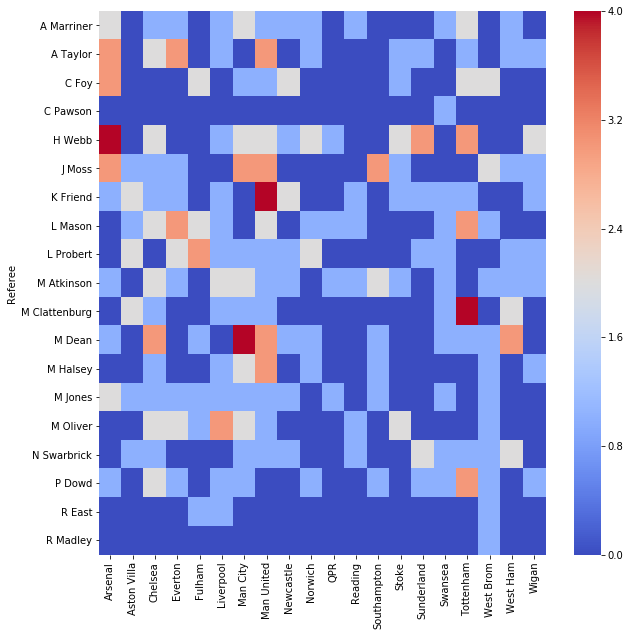

In [46]:
tempdf = pd.get_dummies(season2012_13.winner)
referee_2012_13 = pd.DataFrame()
referee_2012_13['Referee']=season2012_13.Referee
referee_2012_13 = pd.concat([referee_2012_13,tempdf],axis=1)
gp=referee_2012_13.groupby('Referee')
ref2012_13=gp.sum()
ref2012_13.drop(['Draw'],axis=1,inplace=True)
plt.figure(figsize=(10,10))
sns.heatmap(ref2012_13,cmap='coolwarm')
plt.show()

In [47]:
#Get number of Home Matches
tempdf = pd.get_dummies(season2012_13.HomeTeam)
referee_2012_13_home = pd.DataFrame()
referee_2012_13_home['Referee']=season2012_13.Referee
referee_2012_13_home = pd.concat([referee_2012_13_home,tempdf],axis=1)
gp=referee_2012_13_home.groupby('Referee')
ref2012_13_home=gp.sum()
ref2012_13_home

,Arsenal,Aston Villa,Chelsea,Everton,Fulham,Liverpool,Man City,Man United,Newcastle,Norwich,QPR,Reading,Southampton,Stoke,Sunderland,Swansea,Tottenham,West Brom,West Ham,Wigan
Referee,,,,,,,,,,,,,,,,,,,,
A Marriner,1,0,0,2,2,1,1,0,4,1,1,1,1,1,2,0,3,0,1,2
A Taylor,1,1,3,1,0,2,1,2,0,2,2,1,1,1,1,2,0,0,2,1
C Foy,4,0,1,0,3,0,1,2,2,1,2,1,0,0,1,0,1,1,1,0
C Pawson,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
H Webb,1,0,1,1,0,2,2,2,4,2,1,1,2,2,1,1,1,1,3,2
J Moss,0,0,0,1,0,1,3,2,0,1,3,1,3,3,0,2,0,1,0,2
K Friend,2,3,1,1,1,2,0,1,2,1,0,3,0,1,2,1,0,1,0,2
L Mason,0,4,2,3,1,1,0,2,0,1,0,1,1,1,2,2,2,1,1,0
L Probert,0,2,0,2,3,0,2,1,1,2,3,0,2,0,0,0,0,2,3,1


In [48]:
#Get number of Away Matches
tempdf = pd.get_dummies(season2012_13.AwayTeam)
referee_2012_13_away = pd.DataFrame()
referee_2012_13_away['Referee']=season2012_13.Referee
referee_2012_13_away = pd.concat([referee_2012_13_away,tempdf],axis=1)
gp=referee_2012_13_away.groupby('Referee')
ref2012_13_away=gp.sum()
ref2012_13_away.head()

,Arsenal,Aston Villa,Chelsea,Everton,Fulham,Liverpool,Man City,Man United,Newcastle,Norwich,QPR,Reading,Southampton,Stoke,Sunderland,Swansea,Tottenham,West Brom,West Ham,Wigan
Referee,,,,,,,,,,,,,,,,,,,,
A Marriner,1,0,3,1,0,2,2,2,1,0,1,1,1,2,1,3,0,1,2,0
A Taylor,2,1,0,3,2,2,0,2,2,2,1,1,0,1,1,0,1,1,1,1
C Foy,0,1,0,0,0,0,1,1,1,2,1,2,1,3,2,0,2,2,2,0
C Pawson,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
H Webb,3,1,3,0,1,3,1,1,1,2,2,2,1,0,2,1,3,1,1,1


In [49]:
#Total Matches under each referee
ref2012_13_total = ref2012_13_home+ref2012_13_away
ref2012_13_total.head()

,Arsenal,Aston Villa,Chelsea,Everton,Fulham,Liverpool,Man City,Man United,Newcastle,Norwich,QPR,Reading,Southampton,Stoke,Sunderland,Swansea,Tottenham,West Brom,West Ham,Wigan
Referee,,,,,,,,,,,,,,,,,,,,
A Marriner,2,0,3,3,2,3,3,2,5,1,2,2,2,3,3,3,3,1,3,2
A Taylor,3,2,3,4,2,4,1,4,2,4,3,2,1,2,2,2,1,1,3,2
C Foy,4,1,1,0,3,0,2,3,3,3,3,3,1,3,3,0,3,3,3,0
C Pawson,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0
H Webb,4,1,4,1,1,5,3,3,5,4,3,3,3,2,3,2,4,2,4,3


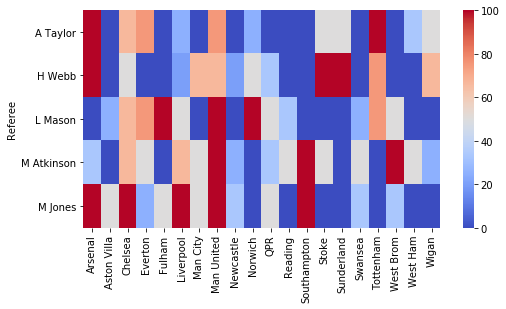

In [50]:
#Win percentage against common referees
ref2012_13_WinPerc = round((ref2012_13/ref2012_13_total)*100,2)
plt.figure(figsize=(8,4))
sns.heatmap(ref2012_13_WinPerc.dropna(),cmap='coolwarm')

Text(0.5,1,'Season 2015-16')

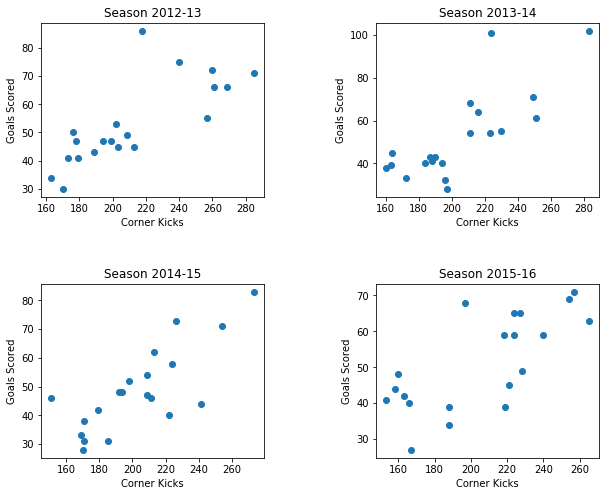

In [51]:
#Corner Kicks vs Goals Scored
plt.figure(figsize=(10,8))
plt.subplots_adjust(hspace=0.5,wspace=0.5)
plt.subplot(2,2,1)
plt.scatter(table_season2012_13.Corners,table_season2012_13.GF)
plt.xlabel('Corner Kicks')
plt.ylabel('Goals Scored')
plt.title('Season 2012-13')
plt.subplot(2,2,2)
plt.scatter(table_season2013_14.Corners,table_season2013_14.GF)
plt.xlabel('Corner Kicks')
plt.ylabel('Goals Scored')
plt.title('Season 2013-14')
plt.subplot(2,2,3)
plt.scatter(table_season2014_15.Corners,table_season2014_15.GF)
plt.xlabel('Corner Kicks')
plt.ylabel('Goals Scored')
plt.title('Season 2014-15')
plt.subplot(2,2,4)
plt.scatter(table_season2015_16.Corners,table_season2015_16.GF)
plt.xlabel('Corner Kicks')
plt.ylabel('Goals Scored')
plt.title('Season 2015-16')

In [52]:
fouls_2012_13 = table_season2012_13[['YCards','RCards','Fouls']].sum()
fouls_2013_14 = table_season2013_14[['YCards','RCards','Fouls']].sum()
fouls_2014_15 = table_season2014_15[['YCards','RCards','Fouls']].sum()
fouls_2015_16 = table_season2015_16[['YCards','RCards','Fouls']].sum()
fouls = fouls_2012_13+fouls_2013_14+fouls_2014_15+fouls_2015_16
Fouls_wt = fouls.RCards/sum(fouls)
print(Fouls_wt)
RCard_wt = fouls.Fouls/sum(fouls)
print(RCard_wt)
YCard_wt = fouls.YCards/sum(fouls)
print(YCard_wt)

0.00616619873527
0.864186192963
0.129647608302


Analyzing Playing Styles of Teams assuming more number of fouls, yellow cards & red cards indicate a rough style of play 

In [53]:
table_season2012_13['Roughness']=table_season2012_13.RCards*RCard_wt+table_season2012_13.YCards*YCard_wt+table_season2012_13.Fouls*Fouls_wt
table_season2013_14['Roughness']=table_season2013_14.RCards*RCard_wt+table_season2013_14.YCards*YCard_wt+table_season2013_14.Fouls*Fouls_wt
table_season2014_15['Roughness']=table_season2014_15.RCards*RCard_wt+table_season2014_15.YCards*YCard_wt+table_season2014_15.Fouls*Fouls_wt
table_season2015_16['Roughness']=table_season2015_16.RCards*RCard_wt+table_season2015_16.YCards*YCard_wt+table_season2015_16.Fouls*Fouls_wt

In [54]:
#Common Teams across Seasons
a = table_season2012_13.index
common = a.intersection(table_season2013_14.index)
common = common.intersection(table_season2014_15.index)
common = common.intersection(table_season2015_16.index)
common = pd.Series(common)
commonteams = pd.DataFrame(index=common,columns=['Roughness'])
commonteams.fillna(value=0,inplace=True)


In [55]:
roughteams=table_season2012_13.Roughness+table_season2013_14.Roughness+table_season2014_15.Roughness+table_season2015_16.Roughness
teamranks=table_season2012_13.Rank+table_season2013_14.Rank+table_season2014_15.Rank+table_season2015_16.Rank
roughteams.dropna(inplace=True)
teamranks.dropna(inplace=True)
commonteams.Roughness=roughteams
commonteams['CombinedRank']=teamranks
commonteams.sort_values('Roughness',ascending=False)

,Roughness,CombinedRank
Team,,
Newcastle,61.622576,59.0
Aston Villa,60.487445,67.0
Stoke,60.350817,40.0
Sunderland,59.672693,64.0
Chelsea,55.080108,17.0
West Ham,54.456456,42.0
Tottenham,53.746950,19.0
West Brom,51.999711,52.0
Man United,51.703104,17.0


In [56]:
GDteams = table_season2012_13.GD+table_season2013_14.GD+table_season2014_15.GD+table_season2015_16.GD
GDteams.dropna(inplace=True)
commonteams=commonteams.join(GDteams)

In [57]:
commonteams.sort_values('GD',ascending=False)

,Roughness,CombinedRank,GD
Team,,,
Man City,51.005956,9.0,172.0
Chelsea,55.080108,17.0,127.0
Arsenal,48.259400,13.0,126.0
Man United,51.703104,17.0,103.0
Liverpool,48.042953,23.0,96.0
Tottenham,53.746950,19.0,63.0
Everton,47.679253,33.0,39.0
Southampton,48.177613,35.0,36.0
West Ham,54.456456,42.0,-8.0


In [58]:
Winteams = table_season2012_13.Won+table_season2013_14.Won+table_season2014_15.Won+table_season2015_16.Won
Winteams.dropna(inplace=True)
GFTeams = table_season2012_13.GF+table_season2013_14.GF+table_season2014_15.GF+table_season2015_16.GF 
GFTeams.dropna(inplace=True)
GATeams = table_season2012_13.GA+table_season2013_14.GA+table_season2014_15.GA+table_season2015_16.GA
GATeams.dropna(inplace=True)
CornerTeams = table_season2012_13.Corners+table_season2013_14.Corners+table_season2014_15.Corners+table_season2015_16.Corners
CornerTeams.dropna(inplace=True)
PointTeams = table_season2012_13.Points+table_season2013_14.Points+table_season2014_15.Points+table_season2015_16.Points
PointTeams.dropna(inplace=True)
commonteams=commonteams.join(Winteams)
commonteams=commonteams.join(GFTeams)
commonteams=commonteams.join(GATeams)
commonteams=commonteams.join(CornerTeams)

In [59]:
commonteams['WinPerc']=round((commonteams.Won/152)*100,2)

In [60]:
commonteams=commonteams.join(PointTeams)

In [61]:
ShotsTeams=table_season2012_13.ShotsTaken+table_season2013_14.ShotsTaken+table_season2014_15.ShotsTaken+table_season2015_16.ShotsTaken
ShotsTeams.dropna(inplace=True)
commonteams=commonteams.join(ShotsTeams)

In [62]:
SOT=table_season2012_13.ShotsOnTarget+table_season2013_14.ShotsOnTarget+table_season2014_15.ShotsOnTarget+table_season2015_16.ShotsOnTarget
SOT.dropna(inplace=True)
commonteams=commonteams.join(SOT)

In [63]:
commonteams['SOTperc']=round((commonteams.ShotsOnTarget/commonteams.ShotsTaken)*100,2)

In [64]:
commonteams

,Roughness,CombinedRank,GD,Won,GF,GA,Corners,WinPerc,Points,ShotsTaken,ShotsOnTarget,SOTperc
Team,,,,,,,,,,,,
Man United,51.703104,17.0,103.0,86.0,261.0,158.0,875.0,56.58,289.0,1976.0,802.0,40.59
Man City,51.005956,9.0,172.0,93.0,322.0,150.0,1082.0,61.18,309.0,2554.0,1028.0,40.25
Chelsea,55.080108,17.0,127.0,85.0,278.0,151.0,955.0,55.92,294.0,2351.0,947.0,40.28
Arsenal,48.259400,13.0,126.0,87.0,276.0,150.0,952.0,57.24,298.0,2254.0,974.0,43.21
Tottenham,53.746950,19.0,63.0,80.0,248.0,185.0,969.0,52.63,275.0,2386.0,992.0,41.58
Everton,47.679253,33.0,39.0,60.0,223.0,184.0,920.0,39.47,229.0,2097.0,857.0,40.87
Liverpool,48.042953,23.0,96.0,76.0,287.0,191.0,972.0,50.00,267.0,2538.0,1041.0,41.02
West Brom,51.999711,52.0,-47.0,42.0,168.0,215.0,748.0,27.63,172.0,1740.0,634.0,36.44
Swansea,47.975073,41.0,-17.0,50.0,189.0,206.0,731.0,32.89,191.0,1818.0,708.0,38.94


In [65]:
#BEST TEAM
print('Best Team by overall points aggregation over 4 seasons: %s' %commonteams.sort_values('Points',ascending=False).index[0])
print('Best Team by overall Win percent aggregation over 4 seasons: %s' %commonteams.sort_values('WinPerc',ascending=False).index[0])
print('Best Team by overall rank(standing) aggregation over 4 seasons: %s' %commonteams.sort_values('CombinedRank',ascending=True).index[0])

Best Team by overall points aggregation over 4 seasons: Man City
Best Team by overall Win percent aggregation over 4 seasons: Man City
Best Team by overall rank(standing) aggregation over 4 seasons: Man City


In [66]:
#WORST TEAM
print('Worst Team by overall points aggregation over 4 seasons: %s' %commonteams.sort_values('Points',ascending=True).index[0])
print('Worst Team by overall Win percent aggregation over 4 seasons: %s' %commonteams.sort_values('WinPerc',ascending=True).index[0])
print('Worst Team by overall rank(standing) aggregation over 4 seasons: %s' %commonteams.sort_values('CombinedRank',ascending=False).index[0])

Worst Team by overall points aggregation over 4 seasons: Aston Villa
Worst Team by overall Win percent aggregation over 4 seasons: Aston Villa
Worst Team by overall rank(standing) aggregation over 4 seasons: Aston Villa


In [67]:
#MOST GOAL CONCEDING TEAM
print('Most Goals conceding team over 4 seasons: %s' %commonteams.sort_values('GA',ascending=False).index[0])
#LEAST GOAL CONCEDING TEAM
print('Least Goals conceding team over 4 seasons: %s' %commonteams.sort_values('GA',ascending=True).index[0])

Most Goals conceding team over 4 seasons: Aston Villa
Least Goals conceding team over 4 seasons: Man City


In [68]:
#MOST GOAL SCORING TEAM
print('Most Goals scoring team over 4 seasons: %s' %commonteams.sort_values('GF',ascending=False).index[0])
#LEAST GOAL SCORING TEAM
print('Least Goals scoring team over 4 seasons: %s' %commonteams.sort_values('GF',ascending=True).index[0])

Most Goals scoring team over 4 seasons: Man City
Least Goals scoring team over 4 seasons: Aston Villa


In [69]:
#MOST ROUGH PLAYING TEAM
print('Most foul conceding team over 4 seasons: %s' %commonteams.sort_values('Roughness',ascending=False).index[0])
#LEAST ROUGH PLAYING TEAM
print('Least foul conceding team over 4 seasons: %s' %commonteams.sort_values('Roughness',ascending=True).index[0])

Most foul conceding team over 4 seasons: Newcastle
Least foul conceding team over 4 seasons: Everton


In [70]:
#MOST ATTACKING TEAM 
print('Most attacking team in terms of number of shots taken across 4 seasons: %s' %commonteams.sort_values('ShotsTaken',ascending=False).index[0])
#MOST ACCURATE TEAM
print('Most accurate team in terms of shots on target across 4 seasons: %s' %commonteams.sort_values('SOTperc',ascending=False).index[0])

Most attacking team in terms of number of shots taken across 4 seasons: Man City
Most accurate team in terms of shots on target across 4 seasons: Arsenal


In [71]:
#TEAM PROGRESS ACROSS SEASONS
Rank12_13=table_season2012_13.Rank
Rank13_14=table_season2013_14.Rank
Rank14_15=table_season2014_15.Rank
Rank15_16=table_season2015_16.Rank
Rank=pd.concat([Rank12_13,Rank13_14,Rank14_15,Rank15_16],axis=1)
Rank.columns.values[0]='S12-13'
Rank.columns.values[1]='S13-14'
Rank.columns.values[2]='S14-15'
Rank.columns.values[3]='S15-16'

In [72]:
Rank.fillna(value=30,inplace=True)

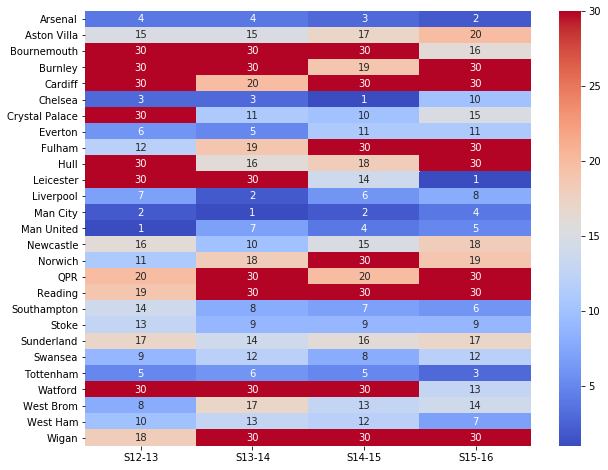

In [73]:
plt.figure(figsize=(10,8))
sns.heatmap(Rank,cmap='coolwarm',annot=True)  #Leicester couldn't make it to EPL during first two season but then ended up winning the league in 15-16 season

In [74]:
#PLAYING STYLES (Shots taken considered to be offensive style of play)
Shots12_13=table_season2012_13.ShotsTaken
Shots13_14=table_season2013_14.ShotsTaken
Shots14_15=table_season2014_15.ShotsTaken
Shots15_16=table_season2015_16.ShotsTaken
Shots=pd.concat([Shots12_13,Shots13_14,Shots14_15,Shots15_16],axis=1)
Shots.columns.values[0]='S12-13'
Shots.columns.values[1]='S13-14'
Shots.columns.values[2]='S14-15'
Shots.columns.values[3]='S15-16'

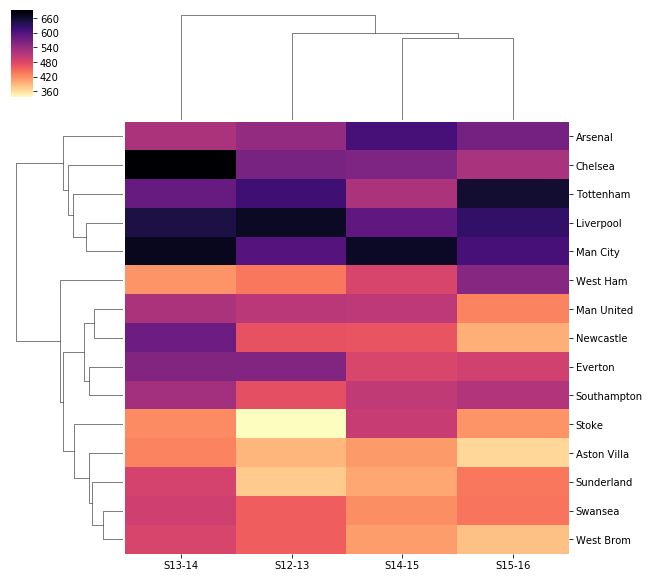

In [75]:
plt.figure(figsize=(10,8))
sns.clustermap(Shots.dropna(),cmap='magma_r')

In [76]:
#PLAYING STYLES (in terms of roughness of play - fouls & cards conceded)
Rough12_13=table_season2012_13.Roughness
Rough13_14=table_season2013_14.Roughness
Rough14_15=table_season2014_15.Roughness
Rough15_16=table_season2015_16.Roughness
Rough=pd.concat([Rough12_13,Rough13_14,Rough14_15,Rough15_16],axis=1)
Rough.columns.values[0]='S12-13'
Rough.columns.values[1]='S13-14'
Rough.columns.values[2]='S14-15'
Rough.columns.values[3]='S15-16'

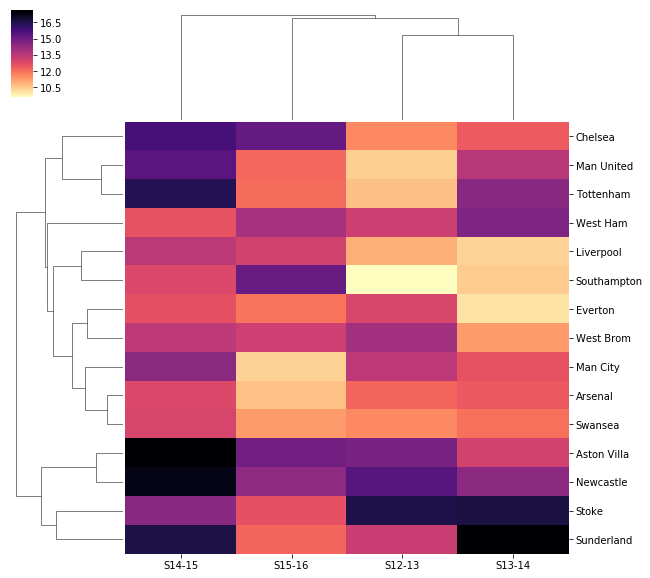

In [77]:
plt.figure(figsize=(10,8))
sns.clustermap(Rough.dropna(),cmap='magma_r')

In [78]:
Goals12_13=season2012_13.FTHG+season2012_13.FTAG
Goals13_14=season2013_14.FTHG+season2013_14.FTAG
Goals14_15=season2014_15.FTHG+season2014_15.FTAG
Goals15_16=season2015_16.FTHG+season2015_16.FTAG
Goals=pd.concat([Goals12_13,Goals13_14,Goals14_15,Goals15_16],axis=1)
Goals.rename(columns={0:'S12-13',1:'S13-14',2:'S14-15',3:'S15-16'},inplace=True)

Text(0,0.5,'Goals per match')

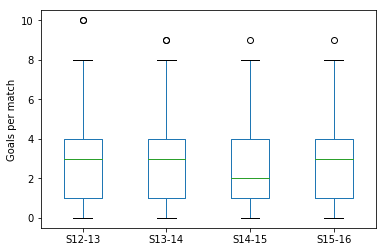

In [79]:
Goals.plot(kind='box')
plt.ylabel('Goals per match')

In [80]:
GD12_13=season2012_13.GoalDif
GD13_14=season2013_14.GoalDif
GD14_15=season2014_15.GoalDif
GD15_16=season2015_16.GoalDif
GD=pd.concat([GD12_13,GD13_14,GD14_15,GD15_16],axis=1)
GD.columns.values[0]='S12-13'
GD.columns.values[1]='S13-14'
GD.columns.values[2]='S14-15'
GD.columns.values[3]='S15-16'

Text(0,0.5,'Goal Diff per match')

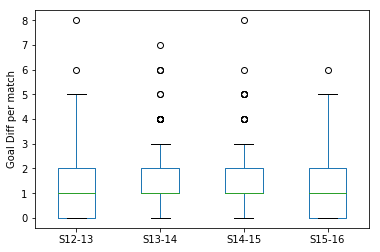

In [81]:
GD.plot(kind='box')
plt.ylabel('Goal Diff per match')